# EDA - Metadata Sitios (Google Maps)

En este archivo se realiza el ETL y el EDA de los archivos en el directorio data/raw/google_maps/metadata-sitios.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys

# Ignorar advertencias
warnings.filterwarnings('ignore')

In [2]:
# Navegar hacia el directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))

# Agregar la ruta del proyecto al sys.path para traer librerías personalizadas
sys.path.append(project_root)

In [3]:
# importar funciones personalizadas en src/utils
from src.utils.EDA import merge_files, get_frequency

## Extracción de Datos

In [4]:
# se guarda el directorio con los datasets en una variable
data_dir = os.path.join(project_root, 'data/raw/google_maps/metadata-sitios')

# se utiliza la función merge_files para unir los archivos en un solo DataFrame
metadata = merge_files(data_dir)

# Se verifica la estructura del DataFrame
metadata.head(3)

Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/metadata-sitios\1.parquet
Archivo 1.parquet leído exitosamente con 275001 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/metadata-sitios\10.parquet
Archivo 10.parquet leído exitosamente con 275001 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/metadata-sitios\11.parquet
Archivo 11.parquet leído exitosamente con 275001 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/metadata-sitios\2.parquet
Archivo 2.parquet leído exitosamente con 275001 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/metadata-sitios\3.parquet
Archivo 3.parquet leído exitosamente con 275001 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/metadata-sitios\4.p

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.35710,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.21529,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


## Filtrar Servicios Gastronómicos Vigentes En Tampa Florida

Se filtran todas las filas que contengan alguna de las palabras clave definidas previamente en una lista.

In [ ]:
# se crea una lista con palabras clave de negocios gastronómicos
services = ['restaurant', 'food', 'pub', 'ice cream', 'coffee', 'bakery', 'diner', 'buffet', 'bar', 'brewery']

# se filtran los datos para obtener aquellos que contienen alguno de los servicios gastronómicos
df = metadata[metadata['category'].apply(
    lambda categories: categories is not None and any(
        any(service.lower() in category for service in services) for category in categories
    )
)]

# se muestra longitud del df resultante y se visualizan primeros elementos
print(len(df))
df.head(3)

188106


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
8,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,None,41.616079,-93.865487,"[Bakery, Health food restaurant]",4.7,21,None,"[[Thursday, 10AM–5:30PM], [Friday, 10AM–5:30PM...","{'Accessibility': None, 'Activities': None, 'A...",Permanently closed,"[0x87ee974869295555:0x95f310d065882c9b, 0x87ec...",https://www.google.com/maps/place//data=!4m2!3...
115,Fresh Point Country Buffet,"Fresh Point Country Buffet, 10525 US-19, Pinel...",0x88c2e4e34f1ed783:0x76c5da381c499d79,None,27.867489,-82.702971,[Buffet restaurant],5.0,2,None,"[[Thursday, 11AM–9PM], [Friday, 11AM–9PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x88c2e5593fbd022b:0x2ccd7a719849c9f7, 0x88c2...",https://www.google.com/maps/place//data=!4m2!3...


En la columna 'state' se puede ver que existen valores 'Permanently closed' indicando que dicho negocio ya no está vigente, por lo que se procederá a eliminar las filas correspondientes.

In [6]:
# se filtran las filas de df cuyo dato en state NO sea 'Permanently closed'
df = df[df['state'] != 'Permanently closed']

# se muestra longitud del df resultante y se visualizan primeros elementos
print(len(df))
df.head(3)

146872


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
117,Mail Station,"Mail Station, 8466 Lockwood Ridge Rd, Sarasota...",0x88c33f1c8e1f99a3:0x99b22c5bd258b3a7,None,27.389683,-82.508387,"[Mailing service, Courier service, Fax service...",3.4,28,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 5PM,"[0x88c3475a64b98c03:0xe8de19a19dae1b2c, 0x88c3...",https://www.google.com/maps/place//data=!4m2!3...
126,Onyx Bar,"Onyx Bar, 11011 W Charleston Blvd, Las Vegas, ...",0x80c8be4e73e8263f:0x3edb275a351e6266,None,36.156205,-115.332636,[Cocktail bar],4.7,8,None,"[[Thursday, 4–11PM], [Friday, 4PM–1AM], [Satur...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 4PM,"[0x80c8be531e3b3471:0xb681abb0b8d07596, 0x80c8...",https://www.google.com/maps/place//data=!4m2!3...


Se filtran los locales que están entre los rangos de Latitud y Longitud correspondientes a Tampa Florida.

In [7]:
# Filtra las filas que estén dentro de los rangos de latitud y longitud de Tampa
df = df[(df['latitude'] >= 27.8) & (df['latitude'] <= 28.2) &
              (df['longitude'] >= -82.7) & (df['longitude'] <= -82.3)]

# se muestra longitud del df resultante y se visualizan primeros elementos
print(len(df))
df.head(3)

687


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
16016,Young's Year Round Notary,"Young's Year Round Notary, 8304 N Alaska St, T...",0x88c2c763fe886c33:0x10af856c6cb7f661,None,28.024292,-82.448998,[Notary public],5.0,8,None,"[[Wednesday, 6–9PM], [Thursday, 6–9PM], [Frida...",None,Closed ⋅ Opens 6PM,"[0x88c2c71aaaaaaaab:0x3135e3e8a725664d, 0x88c2...",https://www.google.com/maps/place//data=!4m2!3...
42589,Young's Year Round Notary,"Young's Year Round Notary, 8304 N Alaska St, T...",0x88c2c763fe886c33:0x10af856c6cb7f661,None,28.024292,-82.448998,[Notary public],5.0,8,None,"[[Wednesday, 6–9PM], [Thursday, 6–9PM], [Frida...",None,Closed ⋅ Opens 6PM,"[0x88c2c71aaaaaaaab:0x3135e3e8a725664d, 0x88c2...",https://www.google.com/maps/place//data=!4m2!3...
79405,Cloud 9 Hookah Lounge,"Cloud 9 Hookah Lounge, 8408 N Armenia Ave, Tam...",0x88c2c13828669dbd:0x862542ecd26e0fae,None,28.025932,-82.486247,"[Hookah bar, Hookah store, Lounge, Tobacco shop]",4.3,108,None,"[[Monday, Closed], [Tuesday, 6–11PM], [Wednesd...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 6PM Tue,"[0x88c2c450571ec37d:0x6e6c90294448f8e6, 0x88c2...",https://www.google.com/maps/place//data=!4m2!3...


## Eliminar Columnas Innecesarias

Las columnas 'description', 'hours', 'state', 'relative_results' y 'url' no aportan ningún valor al proyecto, por lo que se eliminan.

In [8]:
# Eliminar columnas 'description', 'hours', 'state', 'relative_results' y 'url'
df_filtered = df.drop(['description', 'hours', 'state', 'relative_results', 'MISC', 'url'], axis=1).reset_index()

# se verifica estructura del nuevo df
df_filtered.head(3)

,index,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,price
0,16016,Young's Year Round Notary,"Young's Year Round Notary, 8304 N Alaska St, T...",0x88c2c763fe886c33:0x10af856c6cb7f661,28.024292,-82.448998,[Notary public],5.0,8,None
1,42589,Young's Year Round Notary,"Young's Year Round Notary, 8304 N Alaska St, T...",0x88c2c763fe886c33:0x10af856c6cb7f661,28.024292,-82.448998,[Notary public],5.0,8,None
2,79405,Cloud 9 Hookah Lounge,"Cloud 9 Hookah Lounge, 8408 N Armenia Ave, Tam...",0x88c2c13828669dbd:0x862542ecd26e0fae,28.025932,-82.486247,"[Hookah bar, Hookah store, Lounge, Tobacco shop]",4.3,108,None


## Exploración de los Datos

### Vista rápida
Se realiza un breve vistazo de los datos.

In [9]:
# se verifica la estructura del dataframe filtrado
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           687 non-null    int64  
 1   name            687 non-null    object 
 2   address         678 non-null    object 
 3   gmap_id         687 non-null    object 
 4   latitude        687 non-null    float64
 5   longitude       687 non-null    float64
 6   category        687 non-null    object 
 7   avg_rating      687 non-null    float64
 8   num_of_reviews  687 non-null    int64  
 9   price           280 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 53.8+ KB


La columna price tiene demasiados valores nulos imposibles de auditar, por lo que se procederá a eliminarla.

In [10]:
# se elimina la columna price
df_filtered.drop(['price'], axis=1, inplace=True)

In [11]:
# comprensión de variables numéricas
df_filtered.describe()

,index,latitude,longitude,avg_rating,num_of_reviews
count,6.870000e+02,687.000000,687.000000,687.000000,687.000000
mean,1.392547e+06,27.999874,-82.482539,4.168413,179.668122
std,8.744152e+05,0.091989,0.097639,0.661173,428.108414
min,1.601600e+04,27.800496,-82.699596,1.000000,1.000000
25%,5.867045e+05,27.941663,-82.531921,3.800000,17.000000
50%,1.222118e+06,27.992879,-82.483334,4.300000,45.000000
75%,2.130018e+06,28.058198,-82.415988,4.600000,108.000000
max,3.021959e+06,28.199261,-82.300179,5.000000,3610.000000


In [12]:
# visualizar primeras filas
df_filtered.head(3)

,index,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews
0,16016,Young's Year Round Notary,"Young's Year Round Notary, 8304 N Alaska St, T...",0x88c2c763fe886c33:0x10af856c6cb7f661,28.024292,-82.448998,[Notary public],5.0,8
1,42589,Young's Year Round Notary,"Young's Year Round Notary, 8304 N Alaska St, T...",0x88c2c763fe886c33:0x10af856c6cb7f661,28.024292,-82.448998,[Notary public],5.0,8
2,79405,Cloud 9 Hookah Lounge,"Cloud 9 Hookah Lounge, 8408 N Armenia Ave, Tam...",0x88c2c13828669dbd:0x862542ecd26e0fae,28.025932,-82.486247,"[Hookah bar, Hookah store, Lounge, Tobacco shop]",4.3,108


### Comprensión de Variable Categórica

In [13]:
# se crea un df con un explode en la columna category y se visualizan primeros elementos
exploded = df_filtered.explode(column='category')
exploded.head(3)

,index,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews
0,16016,Young's Year Round Notary,"Young's Year Round Notary, 8304 N Alaska St, T...",0x88c2c763fe886c33:0x10af856c6cb7f661,28.024292,-82.448998,Notary public,5.0,8
1,42589,Young's Year Round Notary,"Young's Year Round Notary, 8304 N Alaska St, T...",0x88c2c763fe886c33:0x10af856c6cb7f661,28.024292,-82.448998,Notary public,5.0,8
2,79405,Cloud 9 Hookah Lounge,"Cloud 9 Hookah Lounge, 8408 N Armenia Ave, Tam...",0x88c2c13828669dbd:0x862542ecd26e0fae,28.025932,-82.486247,Hookah bar,4.3,108


In [14]:
# convertir los valores de la columna category a lowercase
exploded['category'] = exploded['category'].str.lower()

In [ ]:
# se reescribe services como expresión regular
services = '|'.join(services)

# mantener solo las categorías que contengan las palabras claves de services y que no me traiga la palabra public
exploded = exploded[
    exploded['category'].str.contains(services, case=False, na=False) & 
    ~exploded['category'].str.contains('public', case=False, na=False)
]

In [16]:
# ver distribución de category 
freq = get_frequency(exploded, 'category')

# ver los tipos de negocios gastronómicos más comunes, su frecuencia y el porcentaje correspondiente
freq.head(20)

,category,frequency,percentage
0,restaurant,136,9.51
1,fast food restaurant,88,6.15
2,coffee shop,72,5.03
3,takeout restaurant,67,4.69
4,breakfast restaurant,61,4.27
5,american restaurant,57,3.99
6,pizza restaurant,46,3.22
7,mexican restaurant,38,2.66
8,coffee store,36,2.52
9,health food restaurant,36,2.52


## Visualización

Se visualiza el comportamiento de las variables de forma gráfica.

### Distribución de Categorías

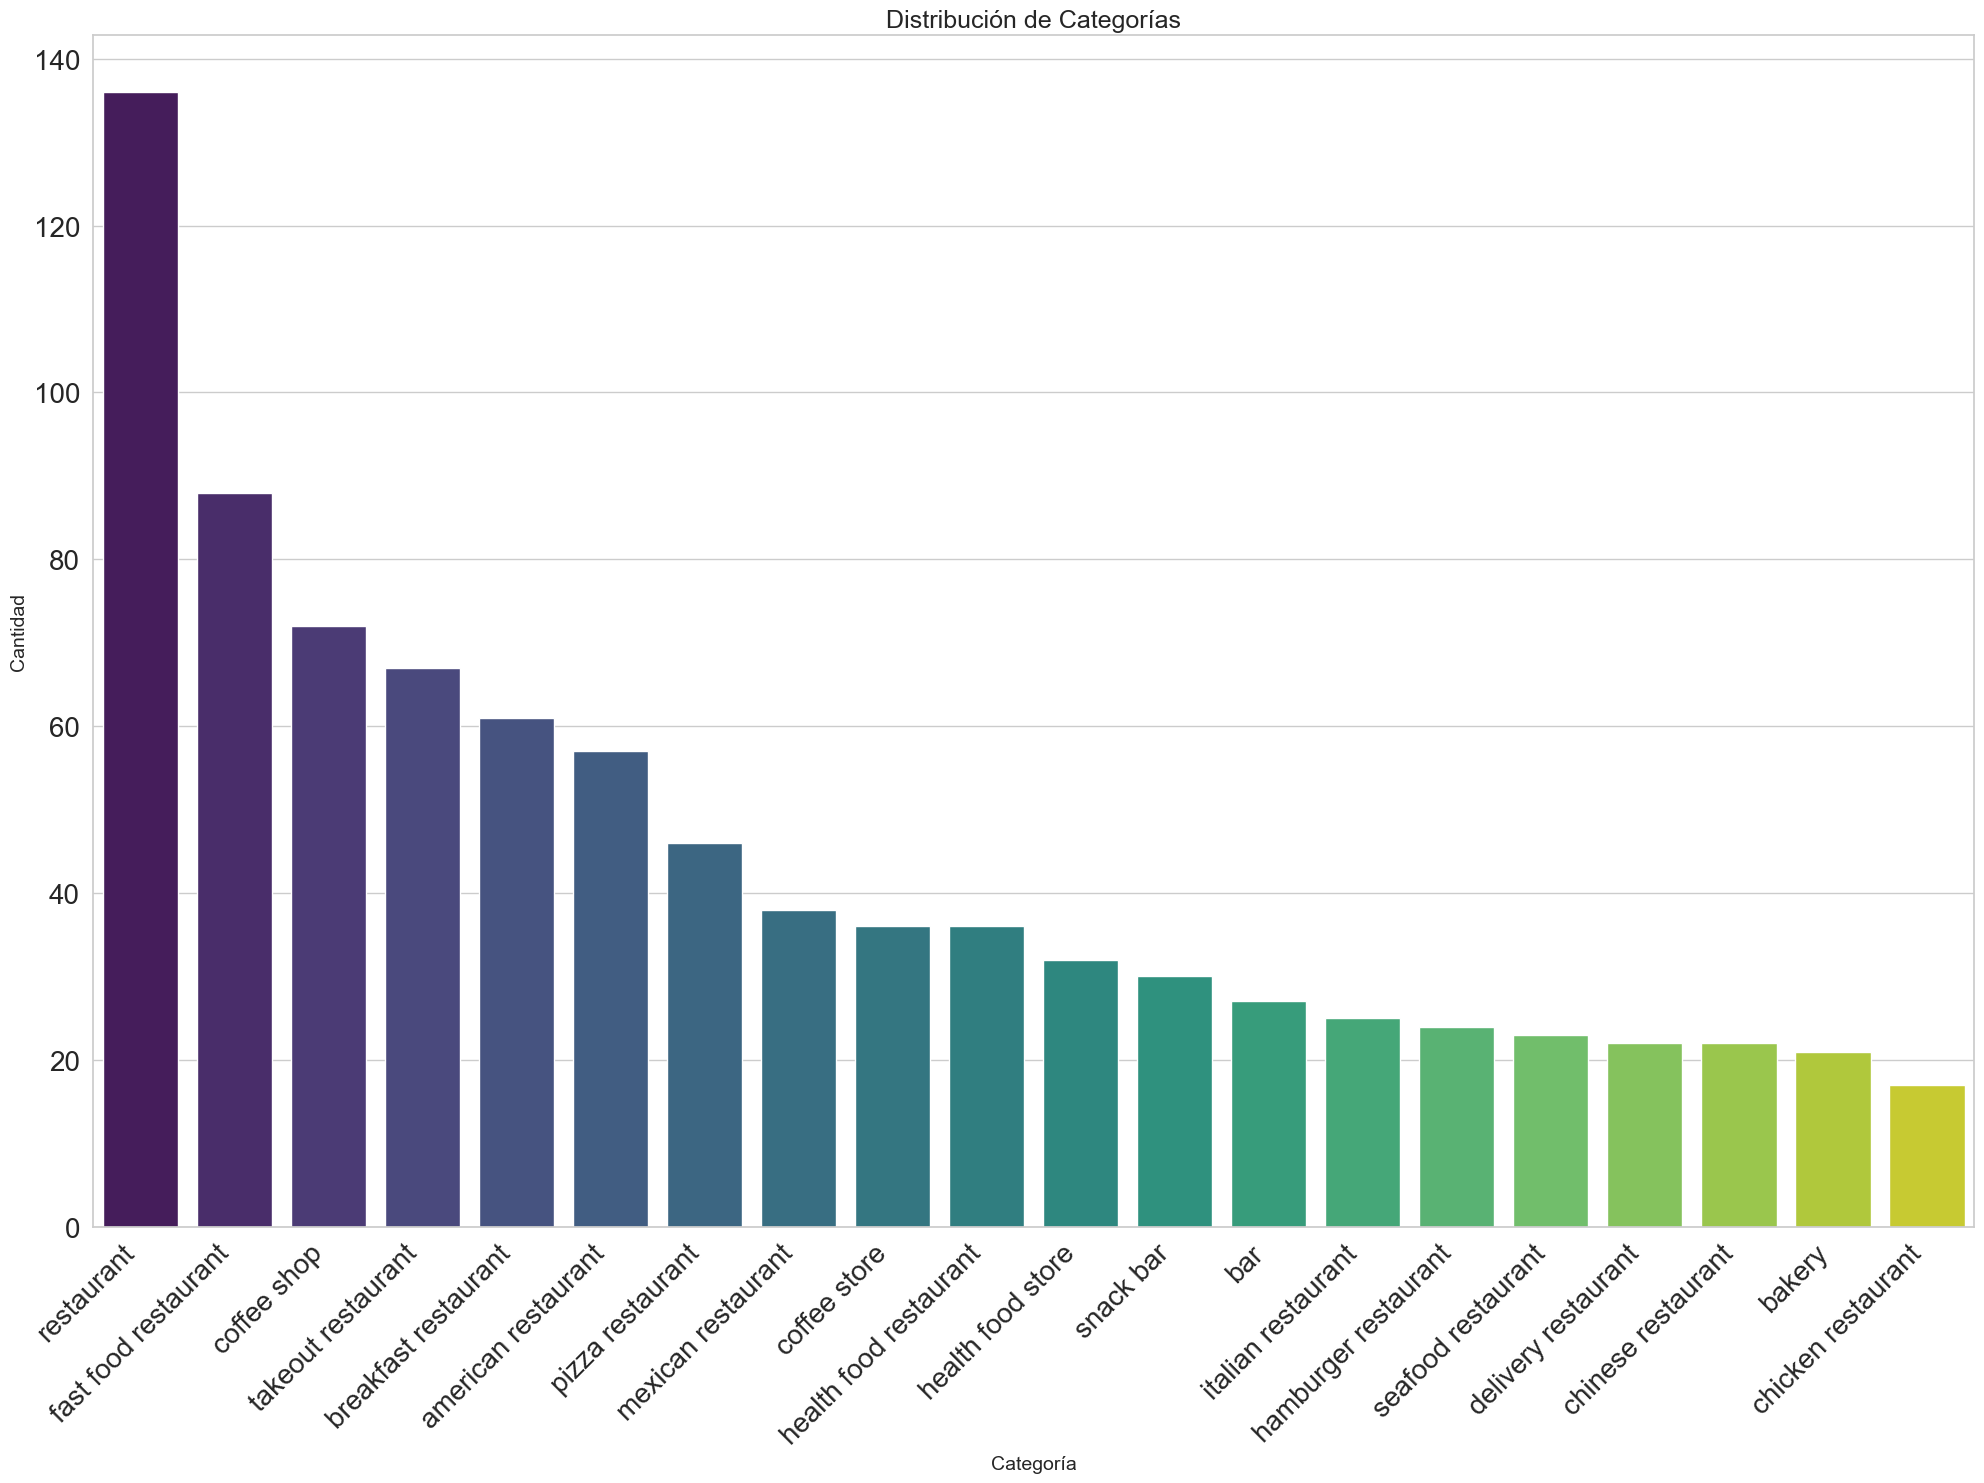

In [17]:
# Gráfico de Barras para ver las categorías más frecuentes
# Configuración del gráfico
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

# Gráfico de barras con rotación de etiquetas
barplot = sns.barplot(x='category', y='frequency', data=freq.head(20), palette="viridis")
barplot.set_title('Distribución de Categorías', fontsize=18)
barplot.set_xlabel('Categoría', fontsize=14)
barplot.set_ylabel('Cantidad', fontsize=14)

# Rotar etiquetas de las categorías en el eje X
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha="right", fontsize=20)
barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=20)

# Mostrar el gráfico
plt.tight_layout()  # Asegura que los elementos no se sobrepongan
plt.show()

### Calificación Promedio por Categoría

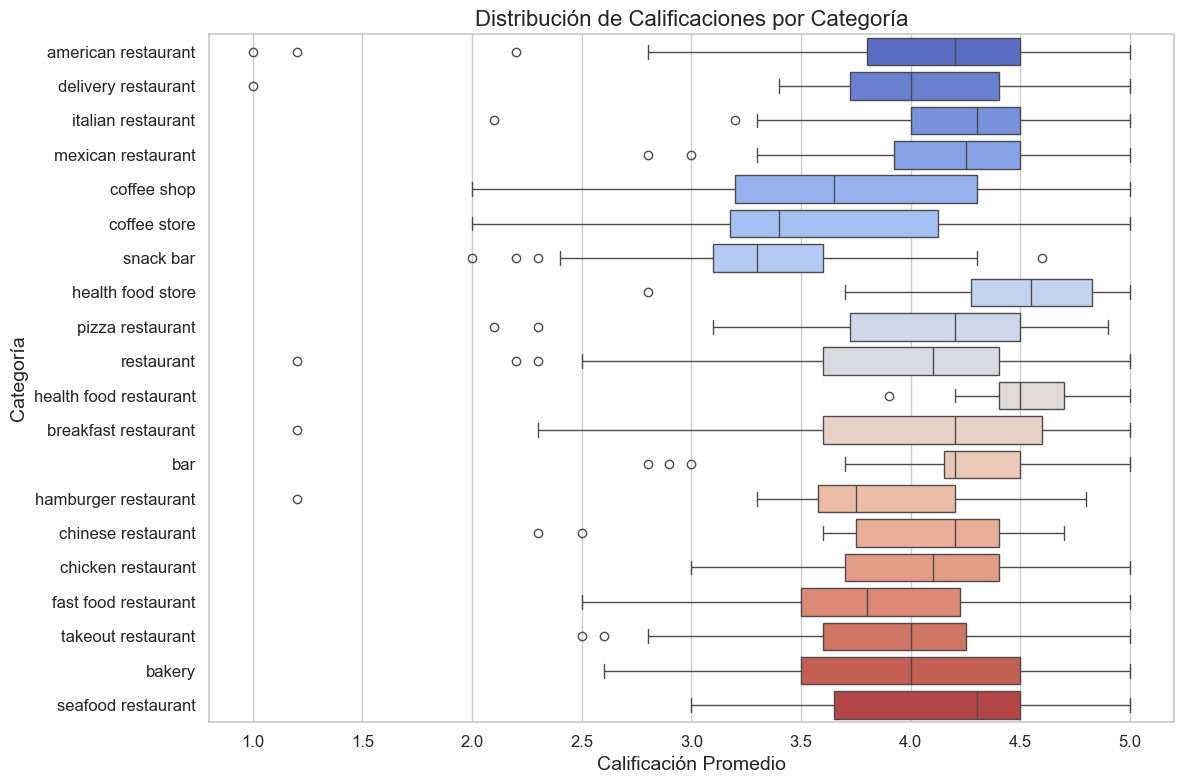

In [18]:
# Filtrar las categorías más frecuentes
top_categories = freq['category'].head(20)  # Ajusta la cantidad de categorías según lo que desees mostrar
filtered_data = exploded[exploded['category'].isin(top_categories)]

# Crear el gráfico de caja
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Usar el boxplot con las categorías en el eje Y
boxplot = sns.boxplot(x='avg_rating', y='category', data=filtered_data, palette="coolwarm")
boxplot.set_title('Distribución de Calificaciones por Categoría', fontsize=16)
boxplot.set_xlabel('Calificación Promedio', fontsize=14)
boxplot.set_ylabel('Categoría', fontsize=14)

# Ajustar tamaño de etiquetas
boxplot.tick_params(axis='y', labelsize=12)
boxplot.tick_params(axis='x', labelsize=12)

# Asegurar que el gráfico se ajuste bien al área de la figura
plt.tight_layout()
plt.show()

Puede verse que en las categorías más comunes, que:
- Las calificaciones promedios oscilan entre 2 y 5 con menor concentración en valores inferiores.
- Los health food restaurants tienen una menor variación en las calificaciones.
- Las mayores concentraciones de calificación en estos locales se encuentran entre 3.5 y 4.6.
- Las medias de calificaciones se encuentran entre 3.1 y 4.8, siendo los health food store los que poseen la media más alta.
- los coffee shops, coffee stores, chicken restaurants, fast food restaurants, bakeries y sea food restaurants no presentan calificaciones promedio atípicas.

### Calificación vs Número de Reseñas

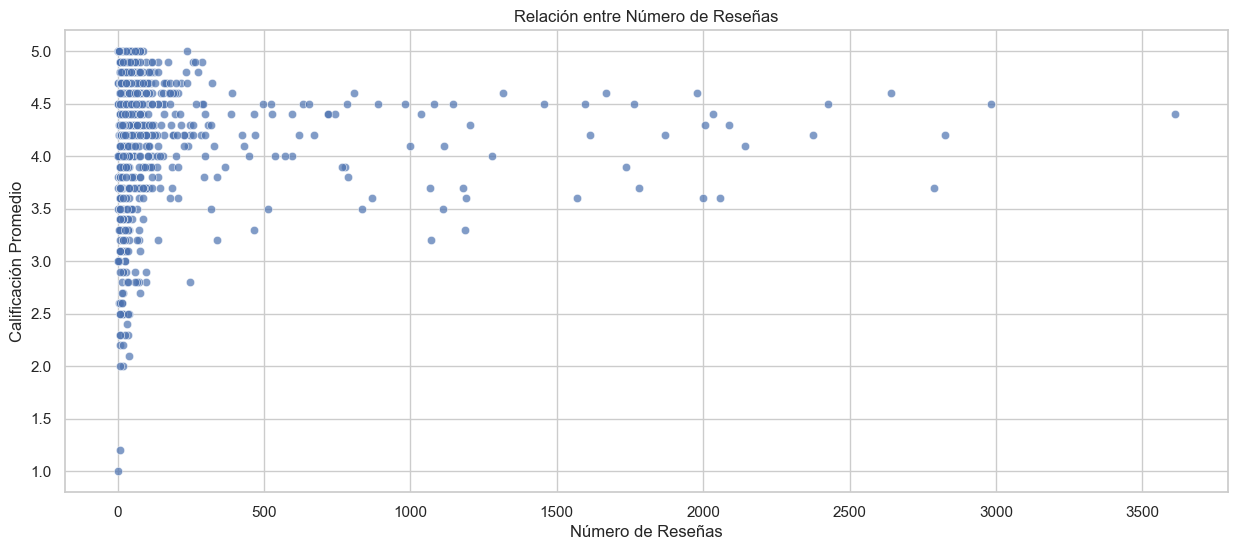

In [19]:
# configuración del diagrama de dispersión
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")

# Gráfico de dispersión con calificación y número de reseñas
sns.scatterplot(x='num_of_reviews', y='avg_rating', data=df_filtered, alpha=0.7)
plt.title('Relación entre Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Calificación Promedio')
plt.show()

- Se puede observar una gran dispersión en la cantidad de reseñas entre las calificaciones promedio de 2.8 y 5 estrellas, pero la mayor dispersión se encuentra entre las calificaciones 3.2 y 4.6.

## Exportar Dataset Final

In [20]:
# Agrupar por las columnas restantes y volver a contraer `category` en listas
df_final = exploded.groupby(['name', 'address', 'gmap_id','latitude', 'longitude', 'avg_rating', 'num_of_reviews']).agg({'category': list}).reset_index()

df_final.head(3)

,name,address,gmap_id,latitude,longitude,avg_rating,num_of_reviews,category
0,10&10 Enoteca,"10&10 Enoteca, 2223 N Westshore Blvd unit B217...",0x88c2c3fba62158e5:0x2523a971ec5aecdf,27.965477,-82.520899,5.0,38,[wine bar]
1,4th Street Pizza,"4th Street Pizza, 3187 4th St N, St. Petersbur...",0x88c2e15d3b6d647b:0xebc778c2e5a83a24,27.801447,-82.637797,4.3,308,"[pizza restaurant, italian restaurant]"
2,7-Eleven - Closed,"7-Eleven - Closed, 6201 9th St N, St. Petersbu...",0x88c2e6a989a2e943:0x6563c425f70fc3e1,27.828921,-82.646562,3.1,8,"[bakery, coffee shop, food products supplier, ..."


In [21]:
# exportar dataframe final en formato parquet
df_final.to_parquet('../../data/processed/google_maps/metadata_final.parquet', index=False, compression='gzip')